In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mpld3

## Alarms 

In [2]:
data = pd.read_csv('alarms_cumsum.csv')
df = pd.read_csv('./dataframes/clean_data.csv')

In [3]:
data.head()

,Unnamed: 0.1,DateTime,Unnamed: 0,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
0,0,2022-01-03 05:49:49,460,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
1,1,2022-01-03 08:41:45,602,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,...,2022-01,10316.0,1,0,0,1,1.0,0,0.0,0
2,2,2022-01-03 08:44:22,606,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,...,2022-01,157.0,0,0,1,1,1.0,0,0.0,0
3,3,2022-01-03 08:46:40,609,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,...,2022-01,138.0,0,0,1,1,1.0,0,0.0,0
4,4,2022-01-03 09:07:11,621,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,...,2022-01,1231.0,1,0,0,1,1.0,0,0.0,0


In [7]:
df.head()

,Unnamed: 0,DateTime,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
0,0,2022-01-03 05:49:49,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
1,1,2022-01-03 08:41:45,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,...,2022-01,10316.0,1,0,0,1,1.0,0,0.0,0
2,2,2022-01-03 08:44:22,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,...,2022-01,157.0,0,0,1,1,1.0,0,0.0,0
3,3,2022-01-03 08:46:40,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,...,2022-01,138.0,0,0,1,1,1.0,0,0.0,0
4,4,2022-01-03 09:07:11,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,...,2022-01,1231.0,1,0,0,1,1.0,0,0.0,0


Text(0, 0.5, 'times')

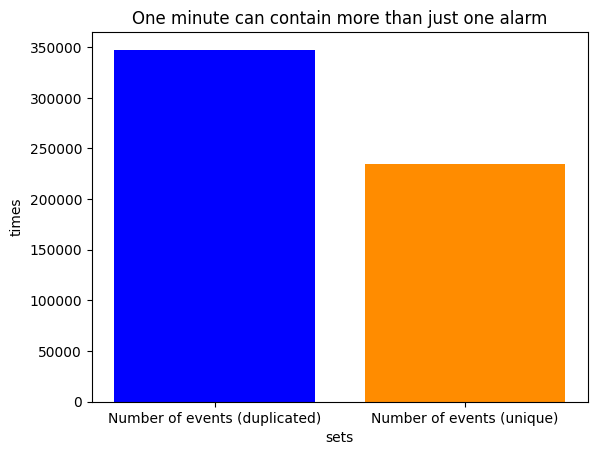

In [8]:
plt.bar(['Number of events (duplicated)', 'Number of events (unique)'], [df.shape[0], df.DateTime.nunique()], color = ["blue", "darkorange"])
plt.title('One minute can contain more than just one alarm')
plt.xlabel("sets")
plt.ylabel("times")

In [10]:
print(f'The number of observations is {df.shape[0]} and after removing duplciates becomes {df.DateTime.nunique()}')

The number of observations is 347494 and after removing duplciates becomes 234575


In [12]:
class Transform:

    def transform(data):
        data['DateTime'] = pd.to_datetime(data['DateTime'])
        data['DateTime'] = data['DateTime'].apply(lambda x: x.replace(second=0))
        data.drop_duplicates(subset = ['DateTime'], keep='first', inplace=True)
        df = data.set_index('DateTime')
        df['all_alarms'] = 1
        df = df.resample('1T').asfreq()
        df.fillna(value=0, inplace=True)
        return df

In [16]:
df.head()

,Unnamed: 0,DateTime,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,...,Year-Week,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences
0,0,2022-01-03 05:49:00,2022-01-03 05:40:00,1,2022-01-03,140,50217,851,1,0,...,2022-01,NaN,1,0,0,1,NaN,0,0.0,0
1,1,2022-01-03 08:41:00,2022-01-03 08:40:00,10,2022-01-03,140,15042,571,1,0,...,2022-01,10316.0,1,0,0,1,1.0,0,0.0,0
2,2,2022-01-03 08:44:00,2022-01-03 08:40:00,10,2022-01-03,140,4074,129,1,0,...,2022-01,157.0,0,0,1,1,1.0,0,0.0,0
3,3,2022-01-03 08:46:00,2022-01-03 08:40:00,10,2022-01-03,140,15042,908,1,0,...,2022-01,138.0,0,0,1,1,1.0,0,0.0,0
4,4,2022-01-03 09:07:00,2022-01-03 09:00:00,6,2022-01-03,140,15042,731,1,0,...,2022-01,1231.0,1,0,0,1,1.0,0,0.0,0


# All alarms

In [14]:
transformed_df = Transform.transform(df)

In [15]:
transformed_df.head()

,Unnamed: 0,rounding,Nr per 10,date,unique_alarms_date,MsgNr,Ms,State,dt,Plant,...,seconds_diff,dependence_bigger10min,dependence_5-10min,dependence_1-5min,dependence_1min,inverted,output,new_output,sequences,all_alarms
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 05:49:00,0.0,2022-01-03 05:40:00,1.0,2022-01-03,140.0,50217.0,851.0,1.0,0.0,L-Ende UV136,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2022-01-03 05:50:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 05:51:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 05:52:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03 05:53:00,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
transformed_df = transformed_df[['sequences', 'MsgNr', 'all_alarms']]
transformed_df['set_alarms'] = transformed_df['sequences'].apply(lambda x: 1 if x > 0 else 0)

In [10]:
transformed_df[:30]

,sequences,MsgNr,all_alarms,set_alarms
DateTime,,,,
2022-01-03 05:49:00,0.0,50217.0,1.0,0
2022-01-03 05:50:00,0.0,0.0,0.0,0
2022-01-03 05:51:00,0.0,0.0,0.0,0
2022-01-03 05:52:00,0.0,0.0,0.0,0
2022-01-03 05:53:00,0.0,0.0,0.0,0
2022-01-03 05:54:00,0.0,0.0,0.0,0
2022-01-03 05:55:00,0.0,0.0,0.0,0
2022-01-03 05:56:00,0.0,0.0,0.0,0
2022-01-03 05:57:00,0.0,0.0,0.0,0


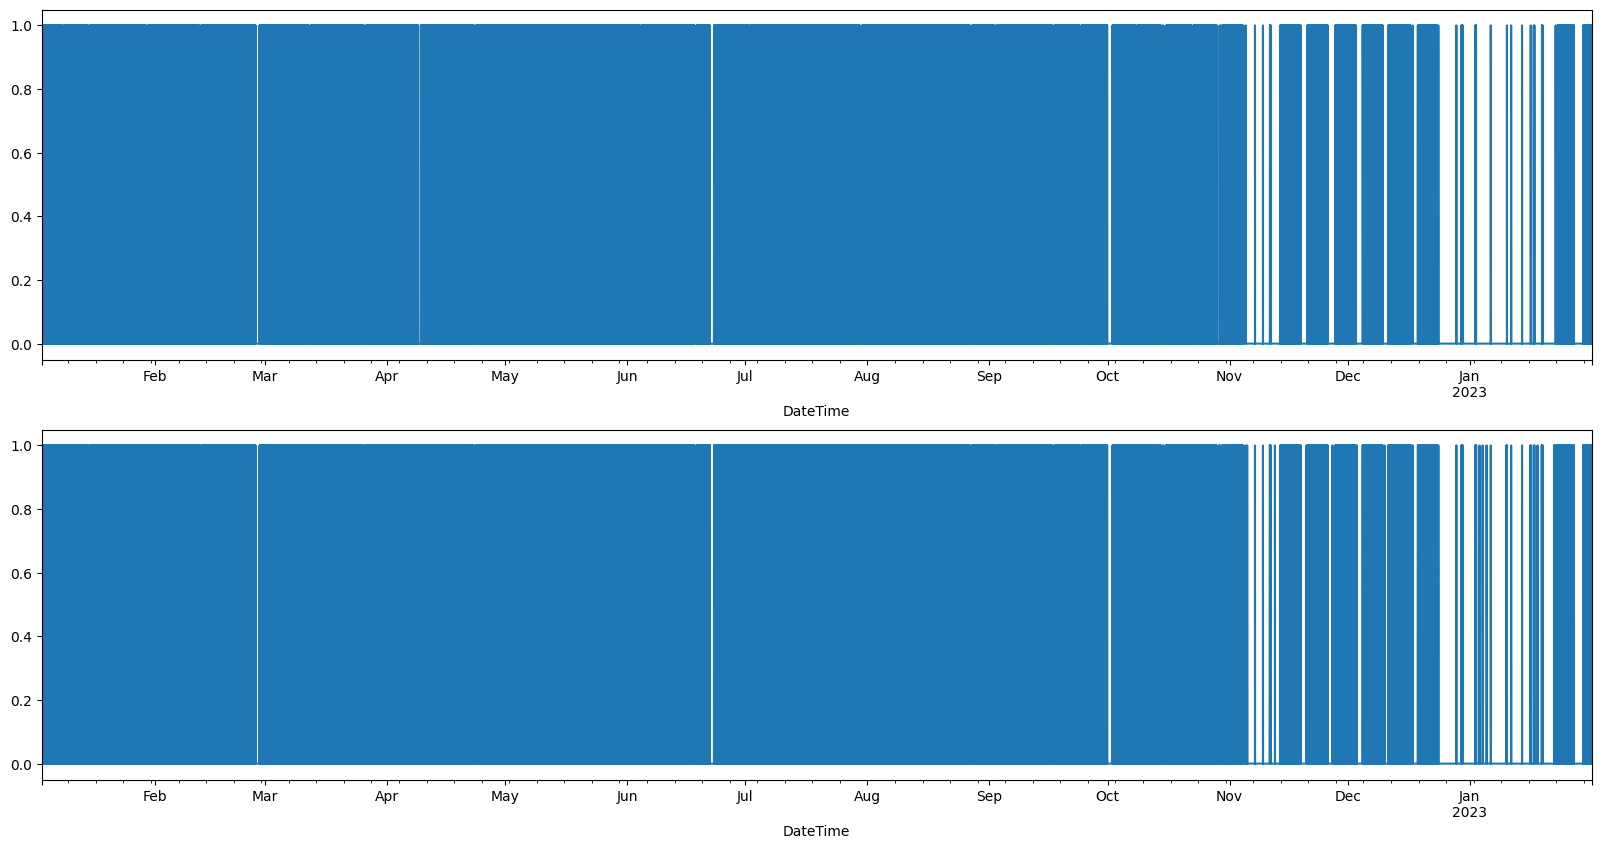

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

transformed_df['set_alarms'].plot(ax =ax1)
transformed_df['all_alarms'].plot(ax=ax2)
plt.show()